In [60]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [62]:
train = pd.read_csv("train.csv")
train.info()
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         70736 non-null  object 
 1   PatientId       70736 non-null  float64
 2   AppointmentID   70736 non-null  int64  
 3   Gender          70736 non-null  object 
 4   ScheduledDay    70736 non-null  object 
 5   AppointmentDay  70736 non-null  object 
 6   Age             70736 non-null  int64  
 7   Neighbourhood   70736 non-null  object 
 8   Scholarship     70736 non-null  int64  
 9   Hipertension    70736 non-null  int64  
 10  Diabetes        70736 non-null  int64  
 11  Alcoholism      70736 non-null  int64  
 12  Handcap         70736 non-null  int64  
 13  SMS_received    70736 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17685 entries, 0 to 17684
Data columns (total 14 columns):


In [63]:
train.head(10)

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,5.554332e+13,5686868,F,2016-05-11T14:12:13Z,2016-05-13T00:00:00Z,55,JARDIM CAMBURI,0,0,0,0,0,0
1,No,4.955162e+14,5668152,F,2016-05-06T08:34:32Z,2016-05-06T00:00:00Z,47,RESISTÊNCIA,0,0,0,0,0,0
2,No,5.541574e+13,5751493,F,2016-05-31T10:13:24Z,2016-05-31T00:00:00Z,56,JESUS DE NAZARETH,1,1,1,0,0,0
3,No,7.445846e+11,5732987,F,2016-05-24T13:07:59Z,2016-06-01T00:00:00Z,66,SÃO PEDRO,0,0,0,0,1,1
4,No,5.395177e+13,5575893,F,2016-04-13T07:42:07Z,2016-05-13T00:00:00Z,0,JABOUR,0,0,0,0,0,0
5,Yes,3.995688e+13,5638797,F,2016-04-29T08:25:38Z,2016-05-09T00:00:00Z,16,NOVA PALESTINA,0,0,0,0,0,0
6,No,5.898862e+13,5729512,F,2016-05-24T07:35:13Z,2016-05-31T00:00:00Z,55,GRANDE VITÓRIA,0,1,0,0,0,1
7,No,4.553518e+12,5682104,M,2016-05-10T15:46:44Z,2016-05-17T00:00:00Z,46,SÃO CRISTÓVÃO,0,0,0,0,0,0
8,No,2.167159e+11,5682043,F,2016-05-10T15:39:28Z,2016-05-16T00:00:00Z,19,NOVA PALESTINA,0,0,0,0,0,0
9,No,9.777815e+12,5665541,F,2016-05-05T14:43:43Z,2016-05-18T00:00:00Z,29,SANTO ANDRÉ,1,0,0,0,0,0


In [64]:
train.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.073600e+04,7.073600e+04,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000
mean,1.482935e+14,5.675468e+06,37.196378,0.098323,0.198753,0.071958,0.030112,0.022860,0.322057
std,2.569717e+14,7.122233e+04,23.123724,0.297753,0.399065,0.258420,0.170897,0.164669,0.467268
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.986487e+12,5.640492e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.177683e+13,5.680853e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.476289e+13,5.725512e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999686e+14,5.790466e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [65]:
#cerco eventuali duplicati
train.duplicated().value_counts()
test.duplicated().value_counts()

False    17685
dtype: int64

In [66]:
#Divido ScheduledDay e AppointmentDay in parametri che spero essere più pratici e informativi
train['mesePrenotazione'] = pd.to_datetime(train['ScheduledDay']).dt.month
train['oraPrenotazione'] = pd.to_datetime(train['ScheduledDay']).dt.hour
train['giornoSettimanaPrenotazione'] = pd.to_datetime(train['ScheduledDay']).dt.weekday
train['meseAppuntamento'] = pd.to_datetime(train['AppointmentDay']).dt.month
train['giornoSettimanaAppuntamento'] = pd.to_datetime(train['AppointmentDay']).dt.weekday
train['giorniTraPrenotazioneEappuntamento'] = abs(pd.to_datetime(train['AppointmentDay']).dt.day - pd.to_datetime(train['ScheduledDay']).dt.day.astype(int))

test['mesePrenotazione'] = pd.to_datetime(test['ScheduledDay']).dt.month
test['oraPrenotazione'] = pd.to_datetime(test['ScheduledDay']).dt.hour
test['giornoSettimanaPrenotazione'] = pd.to_datetime(test['ScheduledDay']).dt.weekday
test['meseAppuntamento'] = pd.to_datetime(test['AppointmentDay']).dt.month
test['giornoSettimanaAppuntamento'] = pd.to_datetime(test['AppointmentDay']).dt.weekday
test['giorniTraPrenotazioneEappuntamento'] = abs(pd.to_datetime(test['AppointmentDay']).dt.day - pd.to_datetime(test['ScheduledDay']).dt.day.astype(int))

In [67]:
#Divido l'età in fasce
bin_edges = [0, 15, 30, 45, 60, 116]

bin_names = ['<15', '15-29', '30-44', '45-59', '>=60']

train['AgeGroup'] = pd.cut(train['Age'], bin_edges, labels=bin_names, right=False, include_lowest=True)
test['AgeGroup'] = pd.cut(test['Age'], bin_edges, labels=bin_names, right=False, include_lowest=True)

In [68]:
#Divido i giorni tra prenotazione e appuntamento in fasce
bin_edges = [0, 1, 3, 7, 14, 21, 31]

bin_names = [0, 1, 2, 3, 4, 5]

train['fasceGiorniAttesa'] = pd.cut(train['giorniTraPrenotazioneEappuntamento'], bin_edges, labels=bin_names, right=False, include_lowest=True)
test['fasceGiorniAttesa'] = pd.cut(test['giorniTraPrenotazioneEappuntamento'], bin_edges, labels=bin_names, right=False, include_lowest=True)

train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,...,Handcap,SMS_received,mesePrenotazione,oraPrenotazione,giornoSettimanaPrenotazione,meseAppuntamento,giornoSettimanaAppuntamento,giorniTraPrenotazioneEappuntamento,AgeGroup,fasceGiorniAttesa
0,No,5.554332e+13,5686868,F,2016-05-11T14:12:13Z,2016-05-13T00:00:00Z,55,JARDIM CAMBURI,0,0,...,0,0,5,14,2,5,4,2,45-59,1
1,No,4.955162e+14,5668152,F,2016-05-06T08:34:32Z,2016-05-06T00:00:00Z,47,RESISTÊNCIA,0,0,...,0,0,5,8,4,5,4,0,45-59,0
2,No,5.541574e+13,5751493,F,2016-05-31T10:13:24Z,2016-05-31T00:00:00Z,56,JESUS DE NAZARETH,1,1,...,0,0,5,10,1,5,1,0,45-59,0
3,No,7.445846e+11,5732987,F,2016-05-24T13:07:59Z,2016-06-01T00:00:00Z,66,SÃO PEDRO,0,0,...,1,1,5,13,1,6,2,23,>=60,5
4,No,5.395177e+13,5575893,F,2016-04-13T07:42:07Z,2016-05-13T00:00:00Z,0,JABOUR,0,0,...,0,0,4,7,2,5,4,0,<15,0


In [69]:
#Controllo quanti elementi unici ho per tutte le features esclusi gli Id e i giorni rimpiazzati
colonne = train.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)
for col in colonne.columns:
  print(col, "-", train[col].unique())

No-show - ['No' 'Yes']
Gender - ['F' 'M']
Age - [ 55  47  56  66   0  16  46  19  29  35  40  20  54  73  38   8  59   2
   7  63  17  44  48  39  76  30  13  12  78  45  58  52  28  67  53  61
  65  24  68   5  43   3  34  84  49  89  81  69  27  37   1  41   9  11
  18  42  75  36  57  22   4  70  51  50  14  33  31   6  64  26  83  62
  23  71  79  21  32  10  77  60  74  72  86  25  15  82  91  87  92  90
  80  85  88  99  95  94  97  96  93  98 102 115 100]
Neighbourhood - ['JARDIM CAMBURI' 'RESISTÊNCIA' 'JESUS DE NAZARETH' 'SÃO PEDRO' 'JABOUR'
 'NOVA PALESTINA' 'GRANDE VITÓRIA' 'SÃO CRISTÓVÃO' 'SANTO ANDRÉ'
 'FORTE SÃO JOÃO' 'CRUZAMENTO' 'JARDIM DA PENHA' 'TABUAZEIRO' 'CENTRO'
 'ROMÃO' 'INHANGUETÁ' 'REPÚBLICA' 'ANDORINHAS' 'SANTA MARTHA'
 'MATA DA PRAIA' 'SANTOS REIS' 'SOLON BORGES' 'ILHA DE SANTA MARIA'
 'CARATOÍRA' 'GURIGICA' 'MARIA ORTIZ' 'BELA VISTA' 'SÃO JOSÉ' 'DA PENHA'
 'PRAIA DO SUÁ' 'FONTE GRANDE' 'SANTOS DUMONT' 'SÃO BENEDITO' 'ESTRELINHA'
 'SANTA TEREZA' 'MARUÍPE' 'PIE

In [70]:
h = train.Handcap.value_counts()
total = h[2] + h[3] + h[4]
(total/train.Handcap.count())*100

0.19226419362135264

In [71]:
# Rimuovo gli handicap 2, 3 e 4 perché praticamente assenti di valori

hdt = train.query('Handcap == 2 | Handcap == 3 | Handcap == 4').Handcap
hdtt = test.query('Handcap == 2 | Handcap == 3 | Handcap == 4').Handcap

train.drop(hdt.index, inplace=True)
test.drop(hdtt.index, inplace=True)

train.Handcap.unique()

array([0, 1])

In [72]:
#Questa cella e la successiva mi sono servite per cercare le dipendenze tra le varie features
a = train.drop(["ScheduledDay","AppointmentDay","AppointmentID","Age","PatientId"],axis=1)
a.rename(columns={'No-show':'no_show'}, inplace=True)
class_mapping={'No': 0, 'Yes': 1}
a['no_show'] = a['no_show'].map(class_mapping)
class_mapping2={'F': 0, 'M': 1}
a['Gender'] = a['Gender'].map(class_mapping2)
a = a.query("no_show == 1")
a = a.query("SMS_received == 1")
a = a.query("Alcoholism == 0")
a = a.query("Handcap == 0")
a = a.query("Diabetes == 0")
a = a.query("Hipertension == 0")
a = a.query("Scholarship == 0")
a = a.query("Gender == 1")
for c in a.drop(["no_show",'SMS_received','Handcap','Diabetes','Hipertension','Scholarship','Gender','Alcoholism'],axis=1).columns:
  print(c,"\n", a[c].value_counts())

Neighbourhood 
 MARIA ORTIZ            131
JARDIM CAMBURI         112
RESISTÊNCIA             95
ITARARÉ                 61
CENTRO                  53
                      ... 
MORADA DE CAMBURI        2
COMDUSA                  1
UNIVERSITÁRIO            1
ILHA DO FRADE            1
ARIOVALDO FAVALESSA      1
Name: Neighbourhood, Length: 76, dtype: int64
mesePrenotazione 
 4    683
5    603
3    109
6     67
2      6
1      1
Name: mesePrenotazione, dtype: int64
oraPrenotazione 
 8     185
7     172
9     166
10    155
14    149
15    147
13    133
11    112
16     87
12     64
17     48
18     24
6      15
19      9
20      3
Name: oraPrenotazione, dtype: int64
giornoSettimanaPrenotazione 
 1    343
4    315
2    298
0    257
3    256
Name: giornoSettimanaPrenotazione, dtype: int64
meseAppuntamento 
 5    968
6    446
4     55
Name: meseAppuntamento, dtype: int64
giornoSettimanaAppuntamento 
 1    392
2    375
0    312
3    218
4    172
Name: giornoSettimanaAppuntamento, dtype: int6

In [73]:
b = train.drop(["ScheduledDay","AppointmentDay","AppointmentID","Age","PatientId"],axis=1)
b.rename(columns={'No-show':'no_show'}, inplace=True)
b['no_show'] = b['no_show'].map(class_mapping)
b['Gender'] = b['Gender'].map(class_mapping2)
b = b.query("no_show == 0")
b = b.query("SMS_received == 1")
b = b.query("Alcoholism == 0")
b = b.query("Handcap == 0")
b = b.query("Diabetes == 0")
b = b.query("Hipertension == 0")
b = b.query("Scholarship == 0")
b = b.query("Gender == 1")
for c in b.drop(["no_show",'SMS_received','Handcap','Diabetes','Hipertension','Scholarship','Gender','Alcoholism'],axis=1).columns:
  print(c,"\n", b[c].value_counts())

Neighbourhood 
 JARDIM CAMBURI       320
MARIA ORTIZ          291
RESISTÊNCIA          164
CENTRO               139
JARDIM DA PENHA      138
                    ... 
MORADA DE CAMBURI      2
SANTA HELENA           1
HORTO                  1
UNIVERSITÁRIO          1
ILHA DO BOI            1
Name: Neighbourhood, Length: 78, dtype: int64
mesePrenotazione 
 5    1756
4    1547
3     233
6     221
2      27
1       2
Name: mesePrenotazione, dtype: int64
oraPrenotazione 
 7     577
8     485
10    420
9     413
14    335
13    334
15    298
11    279
16    213
12    176
17    117
18     66
6      48
19     19
20      6
Name: oraPrenotazione, dtype: int64
giornoSettimanaPrenotazione 
 2    845
1    804
4    762
0    691
3    684
Name: giornoSettimanaPrenotazione, dtype: int64
meseAppuntamento 
 5    2429
6    1222
4     135
Name: meseAppuntamento, dtype: int64
giornoSettimanaAppuntamento 
 1    1047
2     993
0     758
3     558
4     430
Name: giornoSettimanaAppuntamento, dtype: int64
giorni

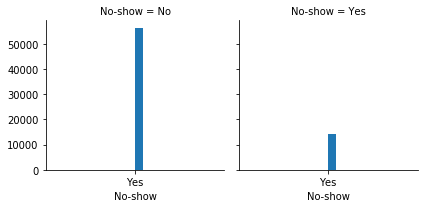

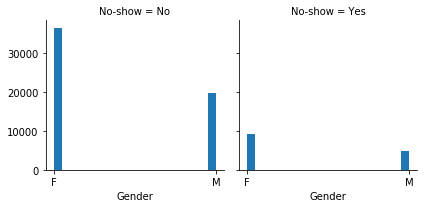

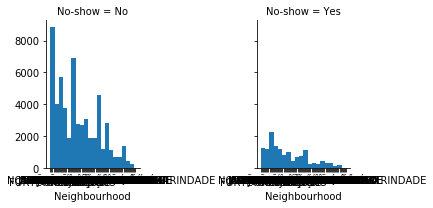

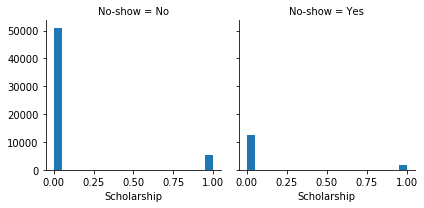

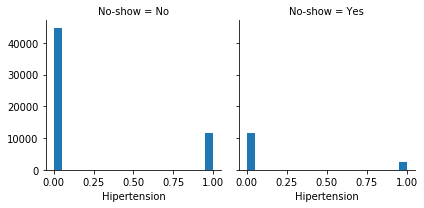

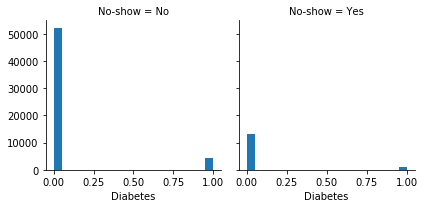

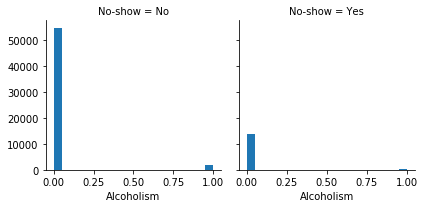

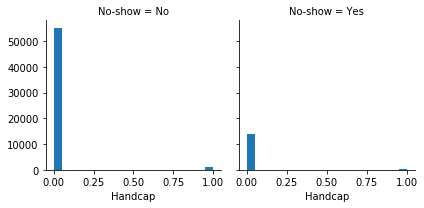

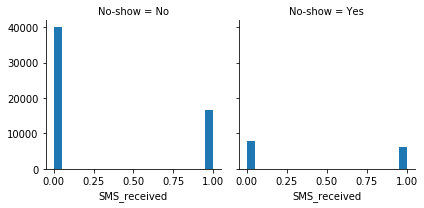

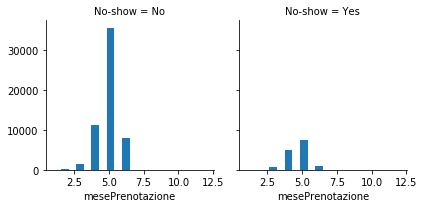

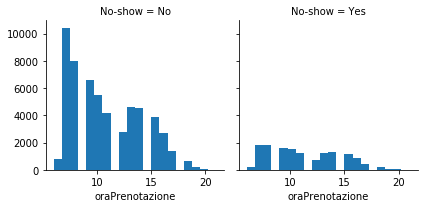

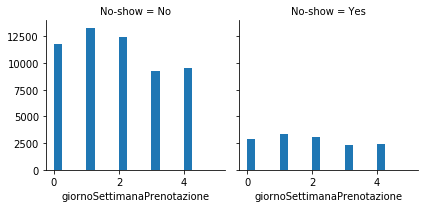

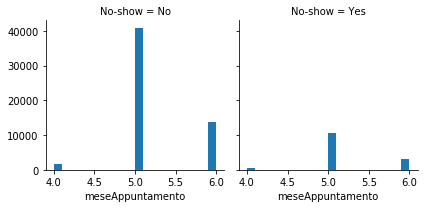

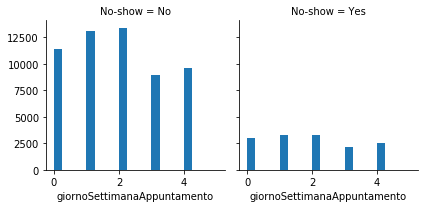

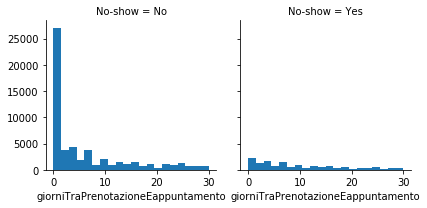

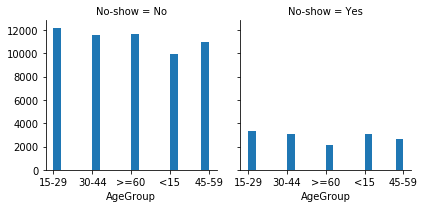

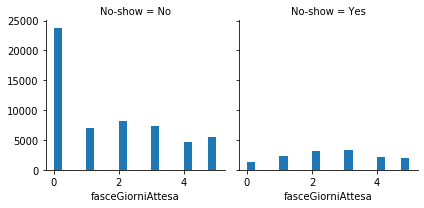

In [74]:
#Mi sono plottato grafici su varie colonne (non solo su No-show, ma non sono mostrate) per controllare come venissero influenzate dalle altre features
for c in train.drop(["ScheduledDay","AppointmentDay","AppointmentID","Age","PatientId"],axis=1).columns:
    fighist = sns.FacetGrid(train, col = 'No-show')
    fighist.map(plt.hist, c, bins=20)

In [75]:
#Transformo le features scelte in interi e divido train e test in X_train, X_test, y_train e y_test
CodificatoreX = LabelEncoder()

class_mapping={'No': 0, 'Yes': 1}
y_train = train['No-show'].map(class_mapping)
y_test = test['No-show'].map(class_mapping)

class_mapping2={'<15':1, '15-29':0, '30-44':2, '45-59':3, '>=60':4}
train['AgeGroup'] = train['AgeGroup'].map(class_mapping2)
test['AgeGroup'] = test['AgeGroup'].map(class_mapping2)

X_train = train.drop(['No-show','AppointmentID','ScheduledDay','AppointmentDay','Age','Neighbourhood','Hipertension','Diabetes','Handcap','PatientId','Scholarship','mesePrenotazione','meseAppuntamento','oraPrenotazione','giorniTraPrenotazioneEappuntamento'],axis=1)
X_test = test.drop(['No-show','AppointmentID','ScheduledDay','AppointmentDay','Age','Neighbourhood','Hipertension','Diabetes','Handcap','PatientId','Scholarship','mesePrenotazione','meseAppuntamento','oraPrenotazione','giorniTraPrenotazioneEappuntamento'],axis=1)

for columns in X_train.columns:
    X_train[columns] = CodificatoreX.fit_transform(X_train[columns])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70600 entries, 0 to 70735
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender                       70600 non-null  int64
 1   Alcoholism                   70600 non-null  int64
 2   SMS_received                 70600 non-null  int64
 3   giornoSettimanaPrenotazione  70600 non-null  int64
 4   giornoSettimanaAppuntamento  70600 non-null  int64
 5   AgeGroup                     70600 non-null  int64
 6   fasceGiorniAttesa            70600 non-null  int64
dtypes: int64(7)
memory usage: 4.3 MB


In [76]:
for columns in X_test.columns:
    X_test[columns] = CodificatoreX.fit_transform(X_test[columns])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17658 entries, 0 to 17684
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender                       17658 non-null  int64
 1   Alcoholism                   17658 non-null  int64
 2   SMS_received                 17658 non-null  int64
 3   giornoSettimanaPrenotazione  17658 non-null  int64
 4   giornoSettimanaAppuntamento  17658 non-null  int64
 5   AgeGroup                     17658 non-null  int64
 6   fasceGiorniAttesa            17658 non-null  int64
dtypes: int64(7)
memory usage: 1.1 MB


In [77]:
#Ho testato anche con LogisticRegression e DecisionTreeClassifier, ma non li mostro perché hanno dato risultati peggiori con le features scelte
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
print("ACCURACY: {}%".format(round(knn.score(X_test.values,y_test.values)*100,2)))

ACCURACY: 79.17%


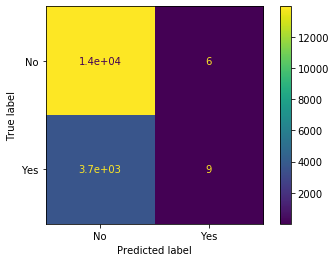

In [78]:
plot_confusion_matrix(knn, X_test.values, y_test.values, display_labels=["No","Yes"])
plt.show()